In [1]:
#Importing independencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive


In [2]:
#Mount google drive and load the data
drive.mount('/content/drive')
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/Datasets/HR_comma_sep.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# **Data PreProcessing:**

---
---

> 1- Chnage the position of (Dependent Variable: 'left') attribute to last index in dataset


> 2- Removing all the Duplicate Values

> 3- Checking for Null values and Data types.



> 4- Checking for unique values and changing data types of categorical variables









In [4]:
#Moving the dependent variable to the LAST INDEX in our Dataset
dataset.insert(len(dataset.columns)-1, 'left_target', dataset.pop('left'))


In [5]:
#Show stats of our data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   Department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left_target            14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
dataset.duplicated().sum()


3008

In [7]:
#Removing the duplicate values
dataset.drop_duplicates(inplace = True)
print("Duplicated rows: ", dataset.duplicated().sum())
print("Remaining rows: ", dataset.size)

Duplicated rows:  0
Remaining rows:  119910


In [8]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left_target
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [9]:
#Checking all the unique values
for column in dataset.columns:
    print(column, ' = ', dataset[column].nunique(), ' unique values')



satisfaction_level  =  92  unique values
last_evaluation  =  65  unique values
number_project  =  6  unique values
average_montly_hours  =  215  unique values
time_spend_company  =  8  unique values
Work_accident  =  2  unique values
promotion_last_5years  =  2  unique values
Department  =  10  unique values
salary  =  3  unique values
left_target  =  2  unique values


In [10]:
# Turning these features datatypes to 'category' to make a group and analyze them
for attribute in ['Work_accident', 'promotion_last_5years', 'Department', 'salary', 'left_target']:
    dataset[attribute] = dataset[attribute].astype('category')
dataset.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident            category
promotion_last_5years    category
Department               category
salary                   category
left_target              category
dtype: object

# **Exploaratory Data Analysis**







---



---




1.   Draw Bar plot of every categorical variable with target variable to check each relation.
2.   Draw the Heat Map to check the correlation between variables



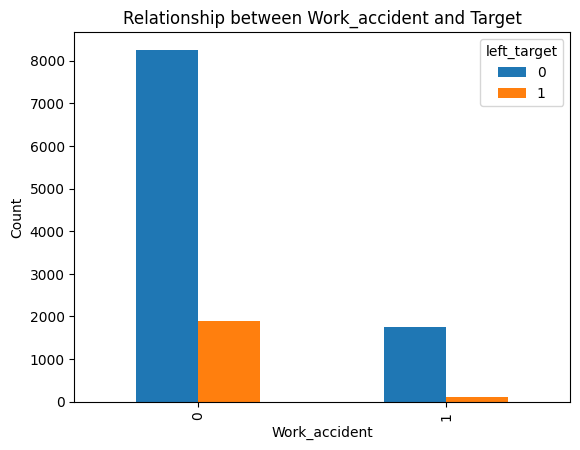

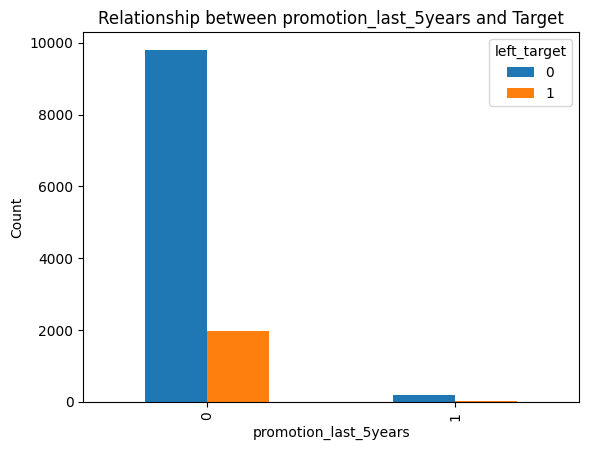

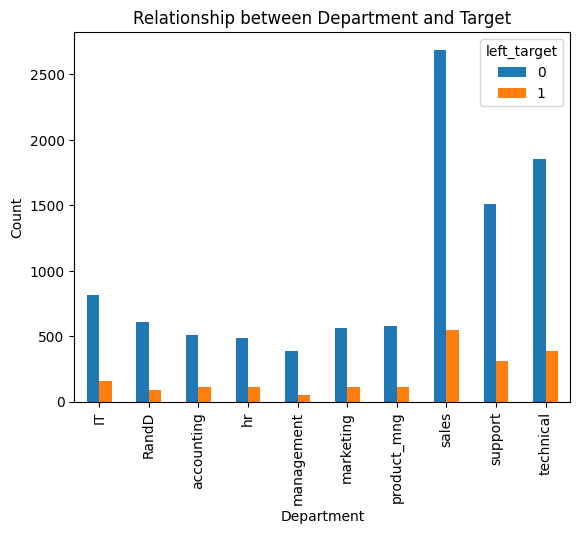

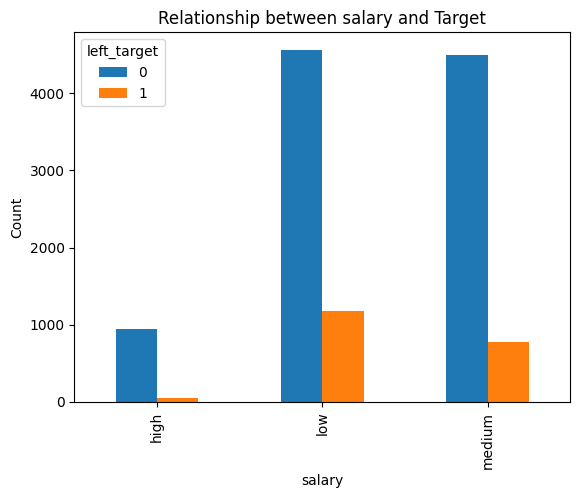

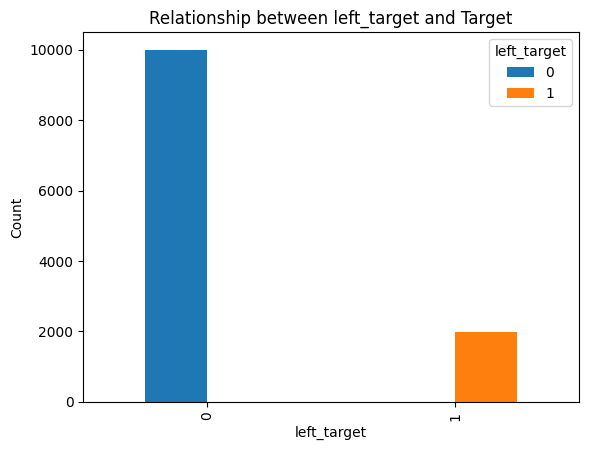

In [12]:
categorical_variables = [column for column in dataset.columns if dataset[column].dtype =='category']

# Group each variable with the target variable
for column in categorical_variables:
    count = dataset.groupby([column, 'left_target'])['left_target'].count().unstack()

    # Create a bar chart of each variable
    count.plot.bar()
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Relationship between ' + column + ' and Target')
    plt.show()
    print()


<ipython-input-13-9ffb6212cba2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


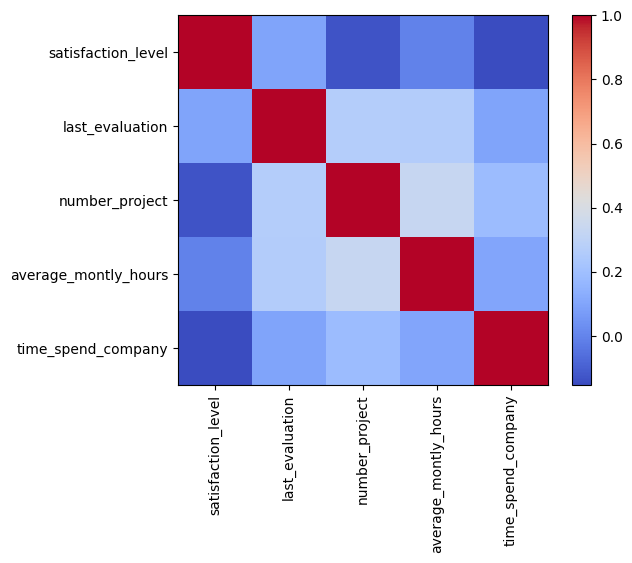

In [13]:
#HEATMAP to visualize the correlation
corr = dataset.corr()
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()


In [14]:
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000


In [15]:
#Turn these features into one-hot encoded features
dataset = pd.get_dummies(data = dataset, columns = ['Work_accident', 'promotion_last_5years', 'Department'],drop_first= True)

#Turn this feature to simple label encoded
dataset.salary = dataset.salary.map({'low':0, 'medium':1, 'high':2})


In [16]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,salary,left_target,Work_accident_1,promotion_last_5years_1,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,1,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,1,1,0,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


<ipython-input-17-9ffb6212cba2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


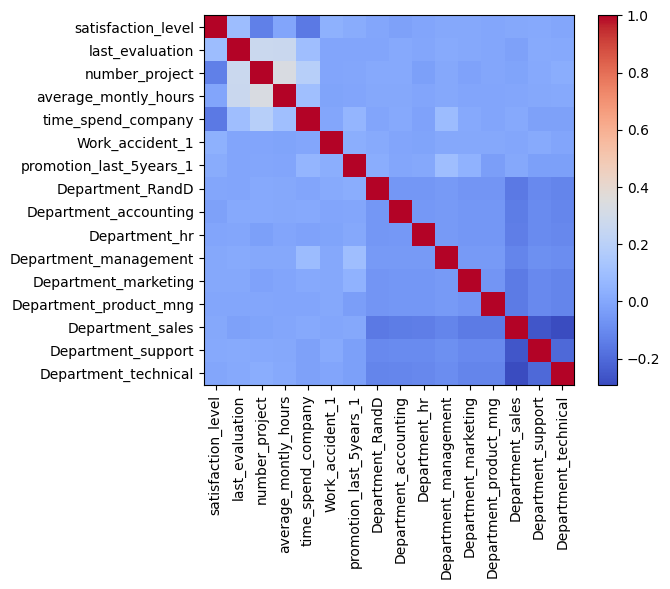

In [17]:
#HEATMAP
corr = dataset.corr()
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()


In [18]:
#Assigning the dependent and independent variables
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [19]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [20]:
# Train the model and pass the data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [28]:
#Check the Accuracy of our model
from sklearn.metrics import accuracy_score, f1_score
print("Model's Accuracy is: ", model.score(X_test, y_test))
print("Model's f1_score is: ", f1_score(model.predict(X_test), y_test))

Model's Accuracy is:  0.9202334630350194
Model's f1_score is:  0.8248932275777914
